In [7]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from tensorflow import keras

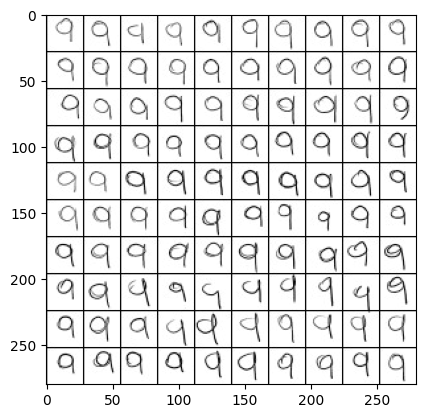

In [8]:
imagen = []
img_list = ["Uno 1.jpg", "Uno 2.jpg","Uno 3.jpg","Uno 4.jpg","Uno 5.jpg","Uno 6.jpg","Uno 7.jpg","Uno 8.jpg","Uno 9.jpg","Uno 10.jpg",
            "Dos 1.jpg","Dos 2.jpg","Dos 3.jpg","Dos 4.jpg","Dos 5.jpg","Dos 6.jpg","Dos 7.jpg","Dos 8.jpg","Dos 9.jpg","Dos 10.jpg",
            "Tres 1.jpg","Tres 2.jpg","Tres 3.jpg","Tres 4.jpg","Tres 5.jpg","Tres 6.jpg","Tres 7.jpg","Tres 8.jpg","Tres 9.jpg","Tres 10.jpg",
            "Cinco 1.jpg","Cinco 2.jpg","Cinco 3.jpg","Cinco 4.jpg","Cinco 5.jpg","Cinco 6.jpg","Cinco 7.jpg","Cinco 8.jpg","Cinco 9.jpg","Cinco 10.jpg",
            "Cero 1.jpg","Cero 2.jpg","Cero 3.jpg","Cero 4.jpg","Cero 5.jpg","Cero 6.jpg","Cero 7.jpg","Cero 8.jpg","Cero 9.jpg","Cero 10.jpg",
            "Nueve 1.jpg","Nueve 2.jpg","Nueve 3.jpg","Nueve 4.jpg","Nueve 5.jpg","Nueve 6.jpg","Nueve 7.jpg","Nueve 8.jpg","Nueve 9.jpg","Nueve 10.jpg",]
for img in img_list:
    imagen2 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    imagen.append(imagen2)
plt.imshow(imagen[50], cmap='gray') #Cargar img para mostrar
train_x = []
train_y = []

In [9]:
for k in range(len(imagen)):
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            temp = imagen[k][i:i+28, j:j+28]
            train_x.append(temp)
            train_y.append(k)
print(len(train_x))
print(len(train_y))
len(img_list)
lista_img = []
lista_img.append(("0(1).jpg", 0))
lista_img.append(("1(1).jpg", 1))
lista_img.append(("2(1).jpg", 2))
lista_img.append(("3(1).jpg", 3))
lista_img.append(("4(1).jpg", 4))
lista_img.append(("5(1).jpg", 5))
lista_img.append(("6(1).jpg", 6))
lista_img.append(("7(1).jpg", 7))
lista_img.append(("8(1).jpg", 8))
lista_img.append(("9(1).jpg", 9))

train_x = []
train_y = []

6000
6000


Accuracy: 0.01666666753590107
1/1 [==============================] - 0s 47ms/step
19
Seguridad del 1%
No se puede determinar con certeza la clasificación de la imagen.


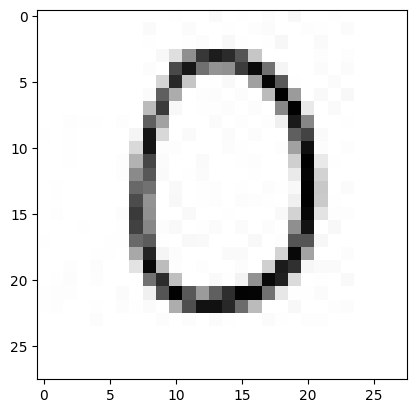

In [10]:
for k in range(len(imagen)):
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            temp = imagen[k][i:i+28, j:j+28]
            train_x.append(temp)
            train_y.append(k)
len(train_x)
len(train_y)
# Obtener número de clases
num_clases = len(np.unique(train_y))

# Convertir etiquetas a one-hot encoding
etiquetas_onehot = tf.keras.utils.to_categorical(train_y, num_clases)

# Convertir datos de entrenamiento a array numpy
train_x = np.array(train_x)
etiquetas_onehot = np.array(etiquetas_onehot)

# Definir modelo
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_clases, activation='softmax')
])
# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
historial = model.fit(train_x, etiquetas_onehot, epochs=10, batch_size=32, verbose=False)

# Evaluar modelo
loss, acc = model.evaluate(train_x, etiquetas_onehot, verbose=False)
print(f'Accuracy: {acc}')
imagen = cv2.imread('0(2).jpg', cv2.IMREAD_GRAYSCALE)
imagen = cv2.resize(imagen, (28, 28))
plt.imshow(imagen.squeeze(), cmap='gray')

imagen = imagen / 255.0
imagen = imagen.reshape(1, 28, 28, 1)
imagen = np.expand_dims(imagen, axis=-1)

prediccion = model.predict(imagen)

etiquetas_predichas = np.argmax(prediccion, axis=1)

maxscore = np.max(prediccion)
print(etiquetas_predichas[0])
print("Seguridad del " + str(int(maxscore * 100)) + "%")

if maxscore >= 0.6:
    print("La imagen es un " + str(etiquetas_predichas[0]))
else:
    print("No se puede determinar con certeza la clasificación de la imagen.")